In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# datasets = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/datasets.csv")

In [2]:
data = sm.datasets.get_rdataset('ausbeer', 'fpp2', cache=True).data
data['date'] = data['time'].apply(lambda x: datetime(int(x), int((x % 1) * 12) + 1, 1))
data = data.drop(columns=['time'])
data = data.set_index('date')
data.head()

,value
date,
1956-01-01,284
1956-04-01,213
1956-07-01,227
1956-10-01,308
1957-01-01,262


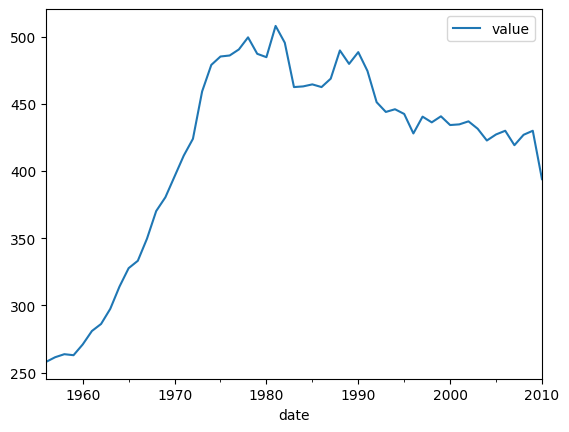

In [3]:
# Resample Example
data.resample(rule='A').mean().plot()
plt.show()

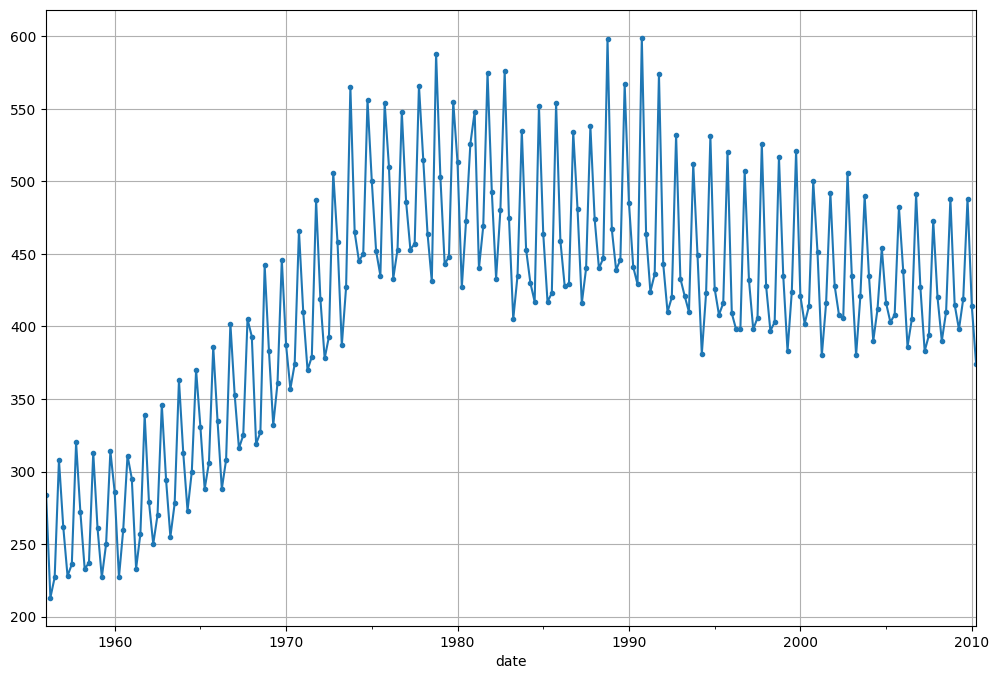

In [4]:
data['value'].plot(grid=True, style='.-', figsize=(12, 8))
plt.show()

In [5]:
data['quarter'] = data.index.quarter
data = data[data.index >= '2000-01-01']
data.head()

,value,quarter
date,,
2000-01-01,421,1
2000-04-01,402,2
2000-07-01,414,3
2000-10-01,500,4
2001-01-01,451,1


In [6]:
# !pip install yfinance
# !pip install yahooquery

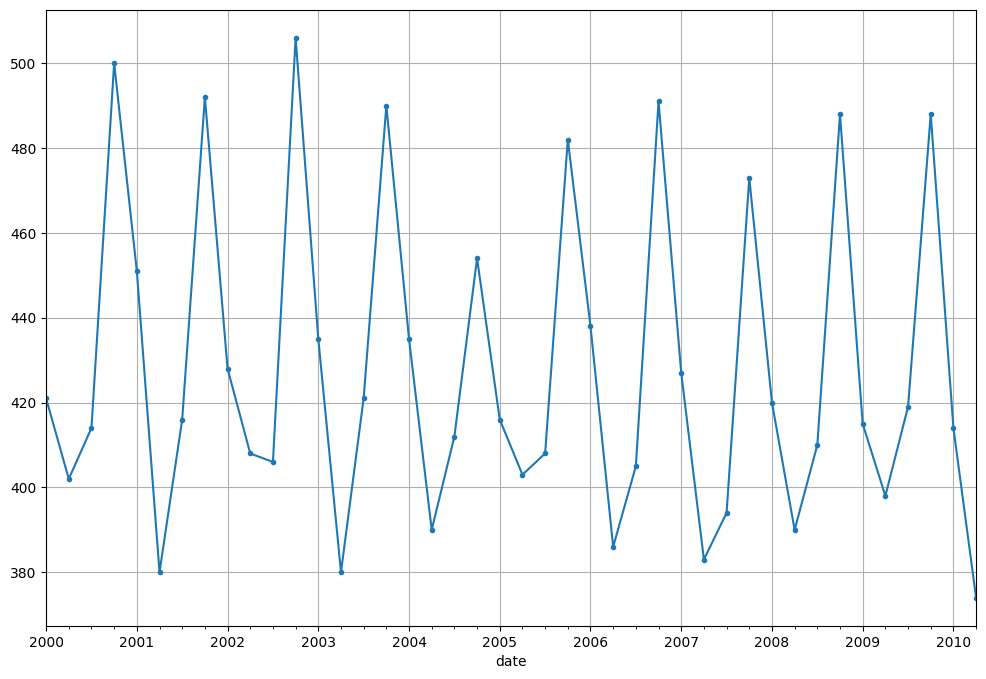

In [7]:
data['value'].plot(grid=True, style='.-', figsize=(12, 8))
plt.show()

In [8]:
data_temp = data.copy()
data_temp['lag1'] = data_temp['value'].shift(1)
data_temp['lag2'] = data_temp['value'].shift(2)
data_temp['lag3'] = data_temp['value'].shift(3)
data_temp['lag4'] = data_temp['value'].shift(4)
data_temp.head()

,value,quarter,lag1,lag2,lag3,lag4
date,,,,,,
2000-01-01,421,1,NaN,NaN,NaN,NaN
2000-04-01,402,2,421.0,NaN,NaN,NaN
2000-07-01,414,3,402.0,421.0,NaN,NaN
2000-10-01,500,4,414.0,402.0,421.0,NaN
2001-01-01,451,1,500.0,414.0,402.0,421.0


In [9]:
data_temp.corr()

,value,quarter,lag1,lag2,lag3,lag4
value,1.000000,0.578729,-0.054567,-0.785935,-0.028291,0.903525
quarter,0.578729,1.000000,-0.791830,-0.342932,0.563781,0.562454
lag1,-0.054567,-0.791830,1.000000,-0.071296,-0.772808,-0.038664
lag2,-0.785935,-0.342932,-0.071296,1.000000,-0.056550,-0.778051
lag3,-0.028291,0.563781,-0.772808,-0.056550,1.000000,-0.048075
lag4,0.903525,0.562454,-0.038664,-0.778051,-0.048075,1.000000


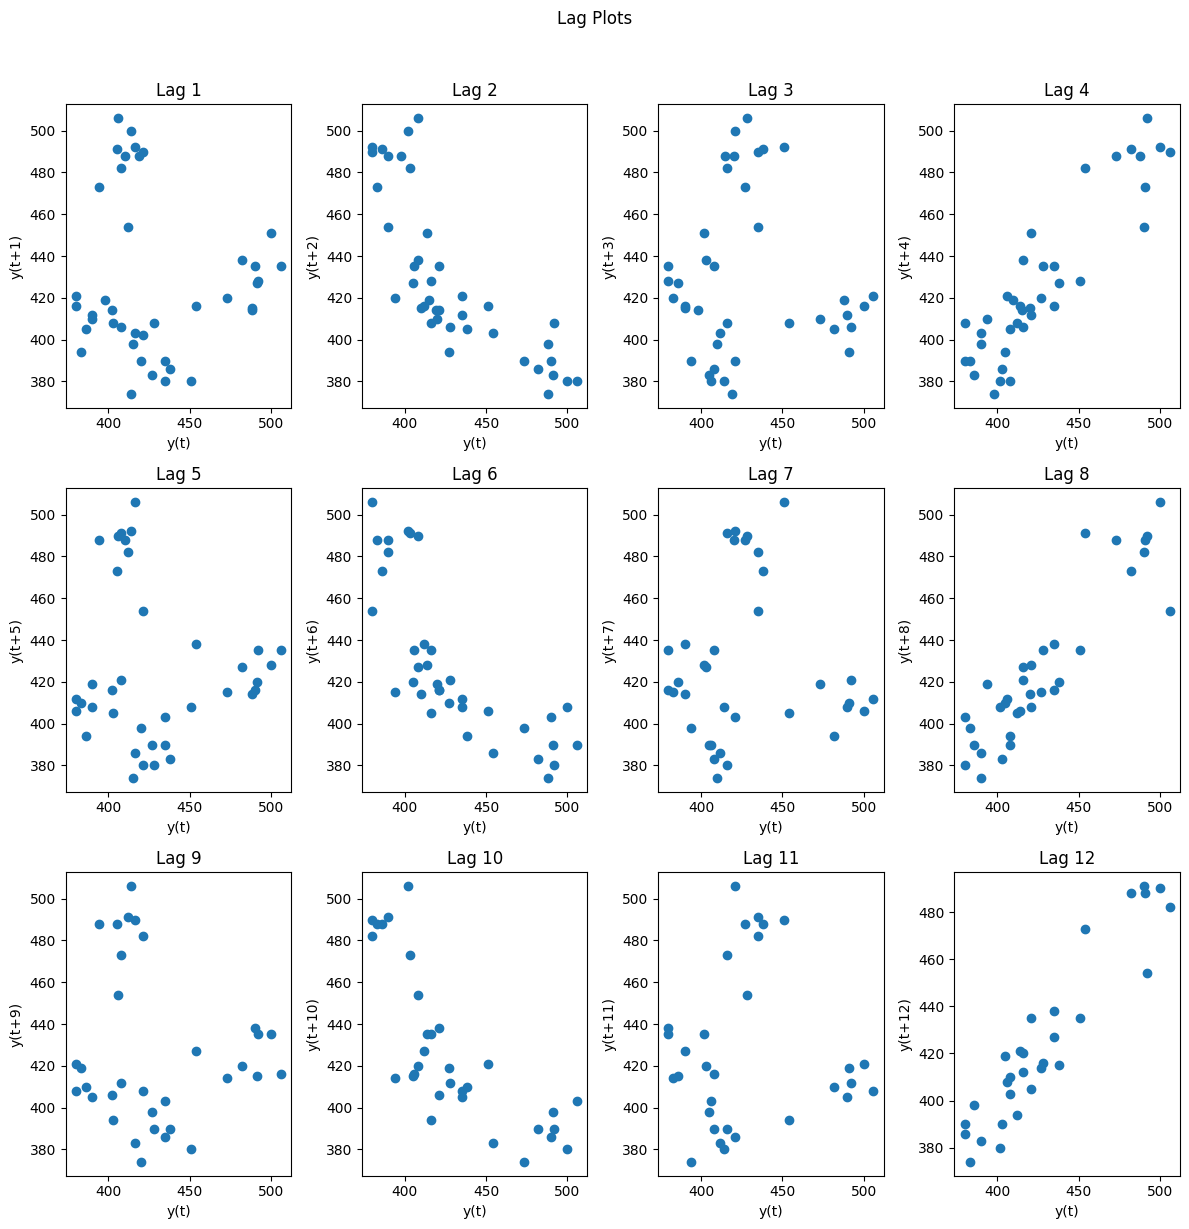

In [10]:
from matplotlib import cm

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 12))
fig.suptitle('Lag Plots', y=1.02)

# Flatten the axes for easier iteration
axes = axes.flatten()

# Create lag plots for lags 1 to 12
for lag, ax in zip(range(1, 13), axes):
    pd.plotting.lag_plot(data['value'], lag=lag, ax=ax)#, c=data['quarter'].iloc[lag:])
    ax.set_title(f'Lag {lag}')
    ax.set_xlabel('y(t)')
    ax.set_ylabel(f'y(t+{lag})')

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

[ 1.         -0.05298108 -0.75817544 -0.02623376  0.80220453 -0.0774712
 -0.65745127  0.00119492  0.70725408 -0.08875626 -0.58762991  0.02412889
  0.6321741  -0.06603664 -0.50456678 -0.00891084  0.49803753]


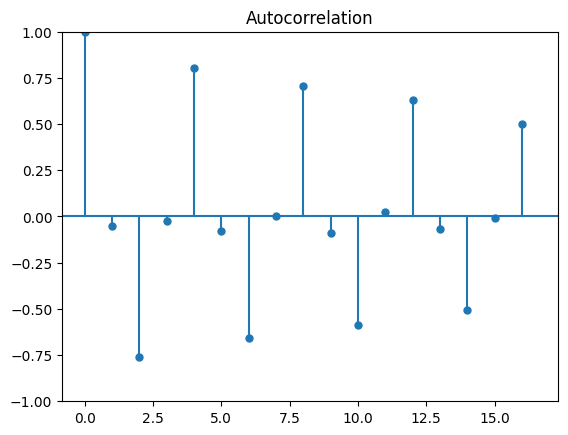

In [11]:
print(sm.tsa.stattools.acf(data['value'], nlags=16))
sm.graphics.tsa.plot_acf(data['value'], lags=16, alpha=1)
plt.show()

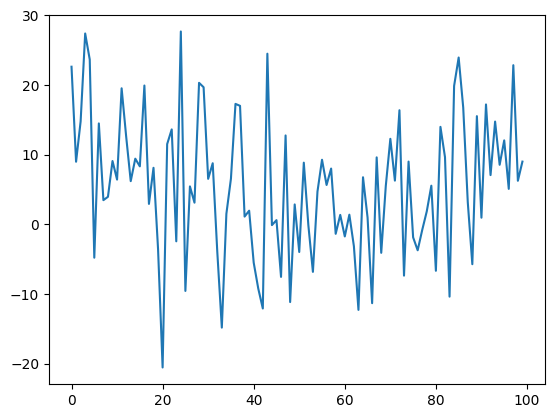

In [12]:
# Generate White Noise, mean=0, stddev=1
np.random.seed(0)
noise = np.random.normal(loc=5, scale=10, size=100)
plt.plot(noise)
plt.show()

[ 1.          0.07149068  0.13664497  0.03486707 -0.0330982   0.02947577
  0.07295543  0.19055283  0.18172587 -0.10907537  0.08437772 -0.04972481
  0.1803898   0.21076136  0.08460036  0.2018417  -0.10940056]


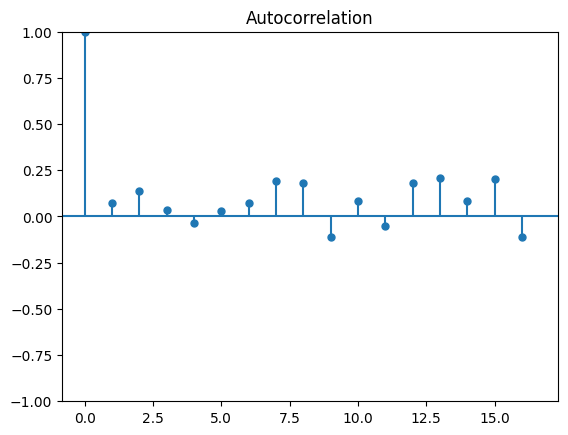

In [13]:
print(sm.tsa.stattools.acf(noise, nlags=16))
sm.graphics.tsa.plot_acf(noise, lags=16, alpha=1)
plt.show()

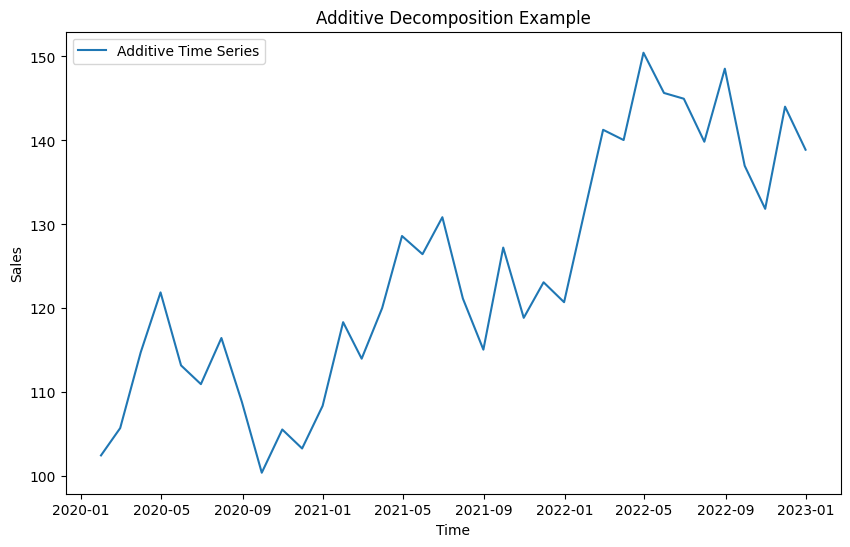

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a sample time series with additive components
np.random.seed(42)
time = pd.date_range(start='2020-01-01', periods=36, freq='M')
trend = np.linspace(100, 150, 36)  # Increasing trend
seasonal = 10 * np.sin(2 * np.pi * np.arange(36) / 12)  # Seasonal pattern
residual = np.random.normal(0, 5, 36)  # Random noise

# Combine components into a time series
sales_additive = trend + seasonal + residual

# Plot the additive time series
plt.figure(figsize=(10, 6))
plt.plot(time, sales_additive, label='Additive Time Series')
plt.title('Additive Decomposition Example')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

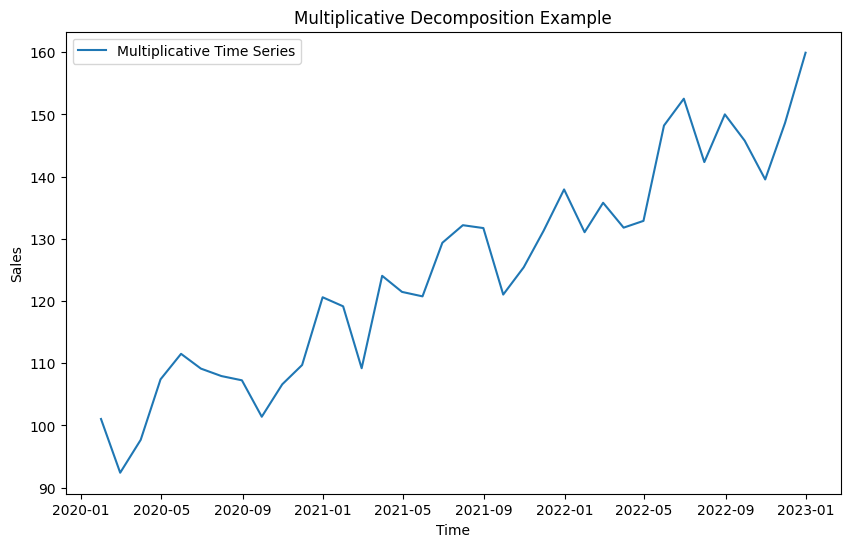

In [15]:
# Generate a sample time series with multiplicative components
trend_multiplicative = np.linspace(100, 150, 36)  # Increasing trend
seasonal_multiplicative = 0.02 * np.sin(2 * np.pi * np.arange(36) / 12)  # Proportional seasonal pattern
residual_multiplicative = np.random.normal(0, 5, 36)  # Random noise

# Combine components into a time series
sales_multiplicative = trend_multiplicative * (1 + seasonal_multiplicative) * (1 + residual_multiplicative / 100)

# Plot the multiplicative time series
plt.figure(figsize=(10, 6))
plt.plot(time, sales_multiplicative, label='Multiplicative Time Series')
plt.title('Multiplicative Decomposition Example')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [16]:
data['4ma'] = data['value'].rolling(4).mean()
data.head()

,value,quarter,4ma
date,,,
2000-01-01,421,1,NaN
2000-04-01,402,2,NaN
2000-07-01,414,3,NaN
2000-10-01,500,4,434.25
2001-01-01,451,1,441.75


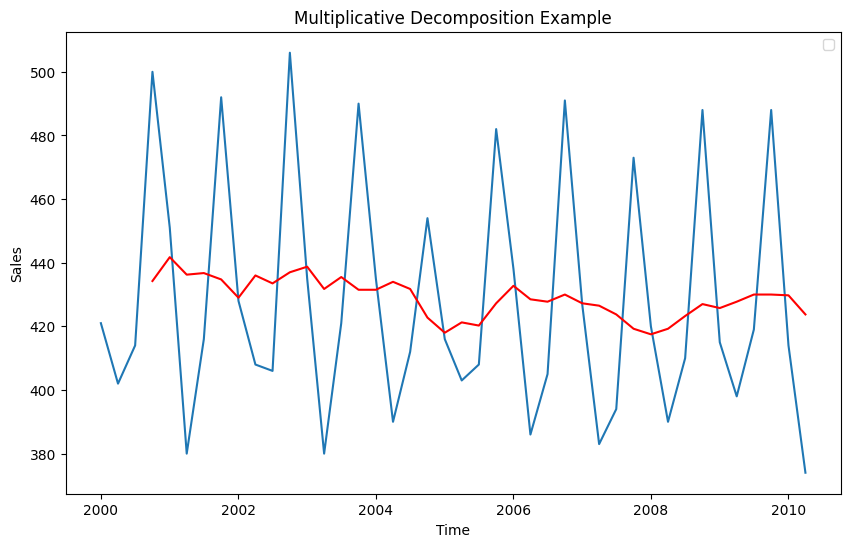

In [17]:
# Plot the multiplicative time series
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['value'])
plt.plot(data.index, data['4ma'], color='red')
plt.title('Multiplicative Decomposition Example')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()